# Prezentacja pracy zaliczeniowej na przedmiot "Praktyczny Machine Learning w Pythonie"
__Autor__: Jakub Wujec  
__github__: https://github.com/kuba1302/ML_project_UW
### Spis treści: 
1. Opis danych
2. Przygotowanie danych 
3. Inżynieria danych
4. Modele 
5. Najlepsze wyniki
6. Konkluzje 


# 1. Opis danych

### 1.1. Pochodzenie danych
Dane pochodzą z UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Adult

### 1.2 Opis zmiennych
Age - Wiek  
__Workclass__ - Miejsce pracy (Prywatne, State-gov, Fedral-gov)  
__Fnlwgt__ - final weight of the column (Nie do końca wytłumaczona zmienna dodana przez autorów)  
__Education__- Poziom edukacji z wyszczególnieniem 16 grup takich jak (9th grade, 11th grade, Bachelors, Doctorante...)   
__Education numerical__ - Poziom edukacji w postaci zmiennej numerycznej   
__Martial status__ - stan cywilny (z wyszczególnieniem także osób rozwiedzionych) 
__Occupation__ - Profesja (15 wyszczególnionych zawodów)  
__Relationship__ - Relacje społeczne, dające oprócz informacji o posiadanym partnerze informacje o dzieciach)   
__Race__ - Rasa   
__Sex__- Płeć   
__Capital gain__ - Zysk kapitału  
__Capital loss__ - Strata kapitału  
__y__ - Nasz cel, zmienna mówiąca czy dana osoba zarobi co najmniej 50k dolarów czy nie 
### 1.3 Eksploracja danych

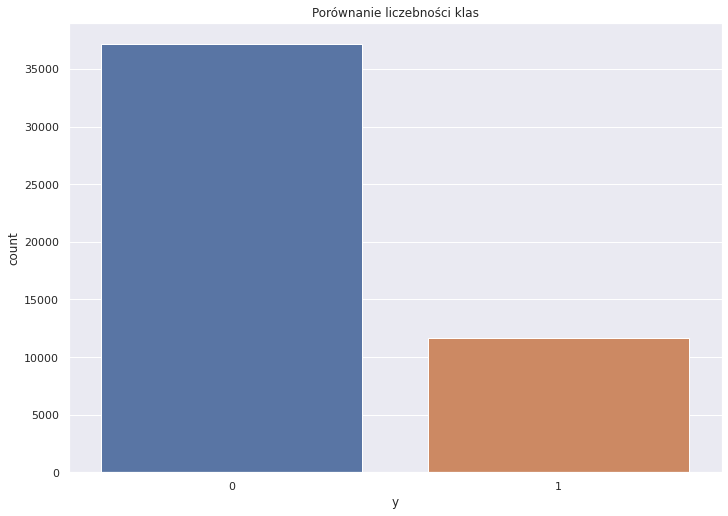

In [20]:
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
raw_data = pd.read_csv('Data/full_data.csv')
features = raw_data.columns.tolist()
features.remove('y')
sns.countplot(x=raw_data['y'])
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title('Porównanie liczebności klas')
plt.show()

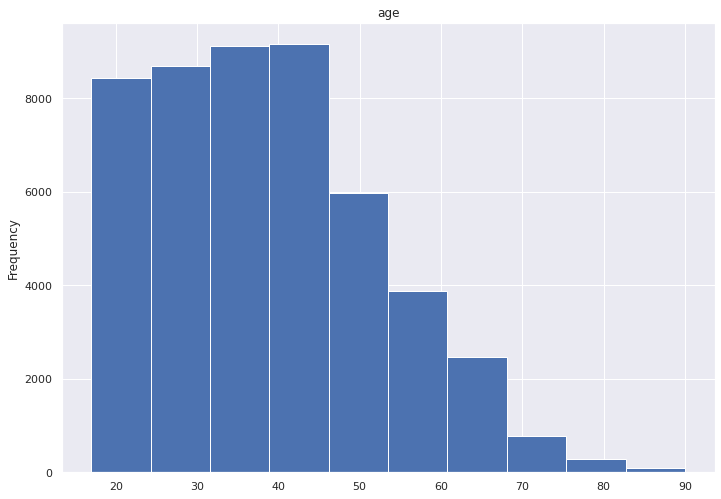

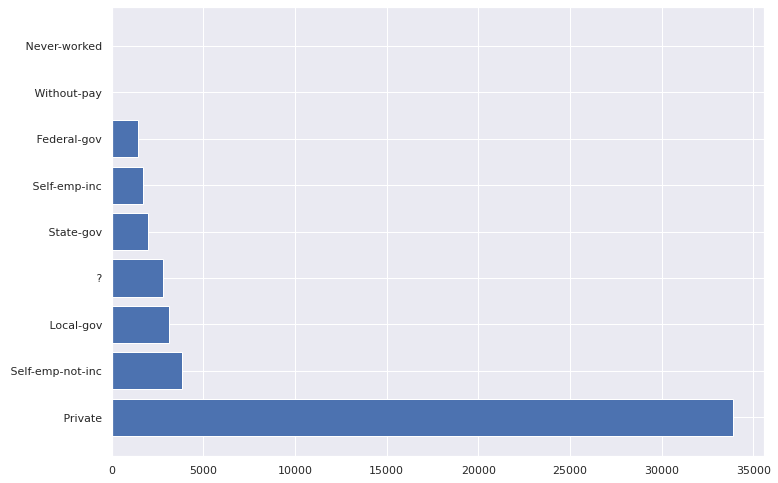

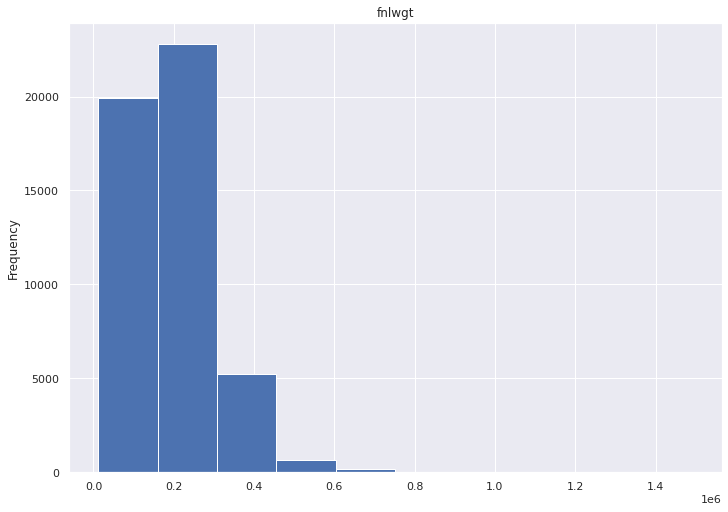

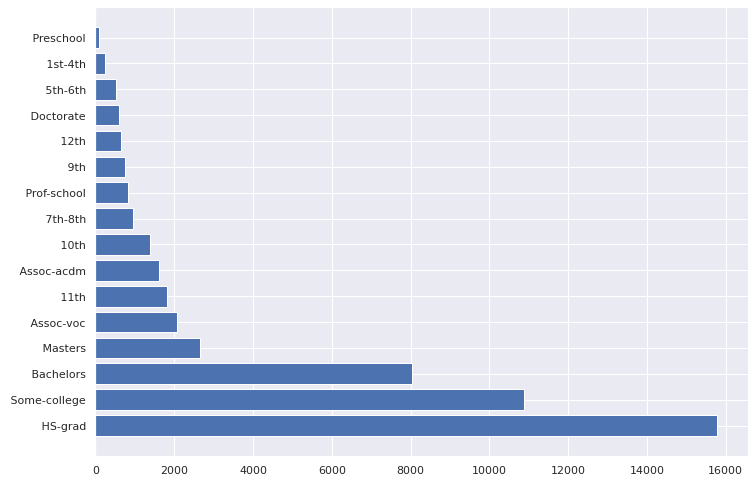

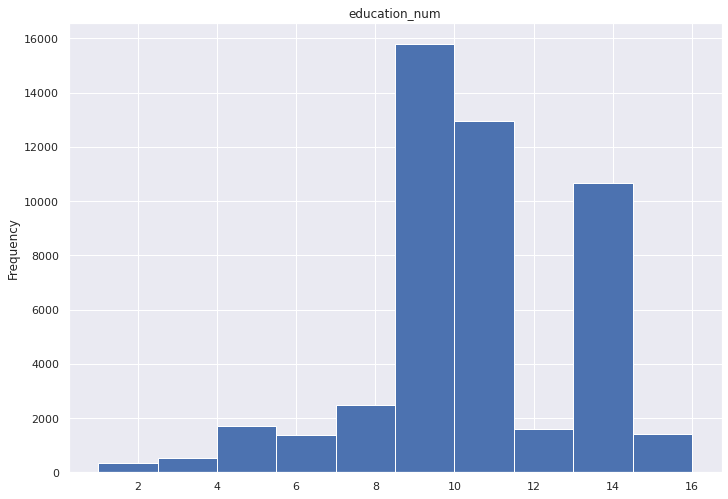

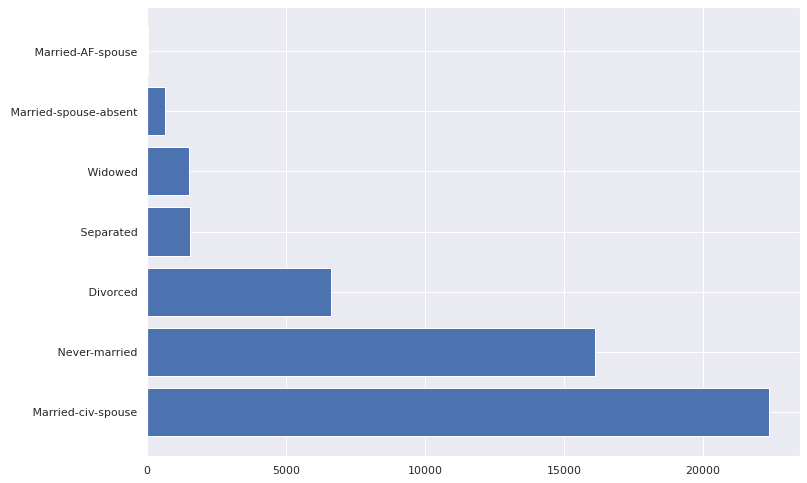

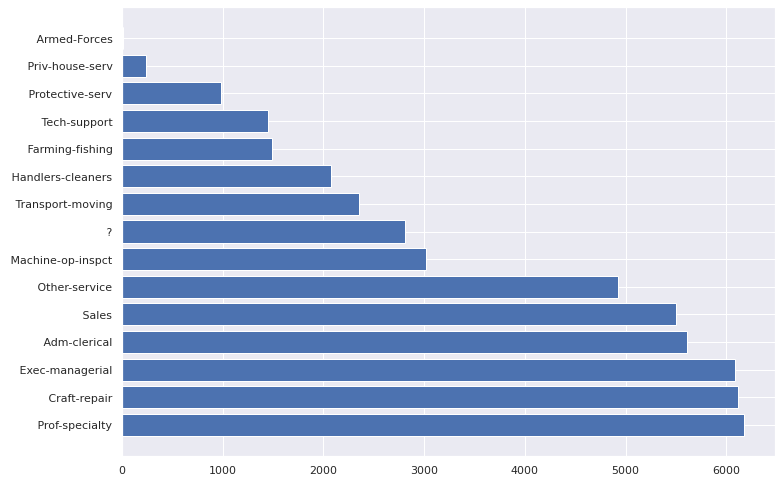

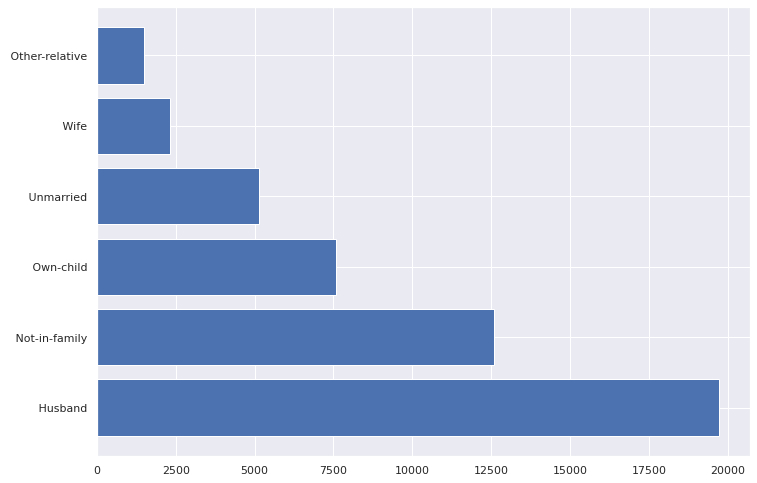

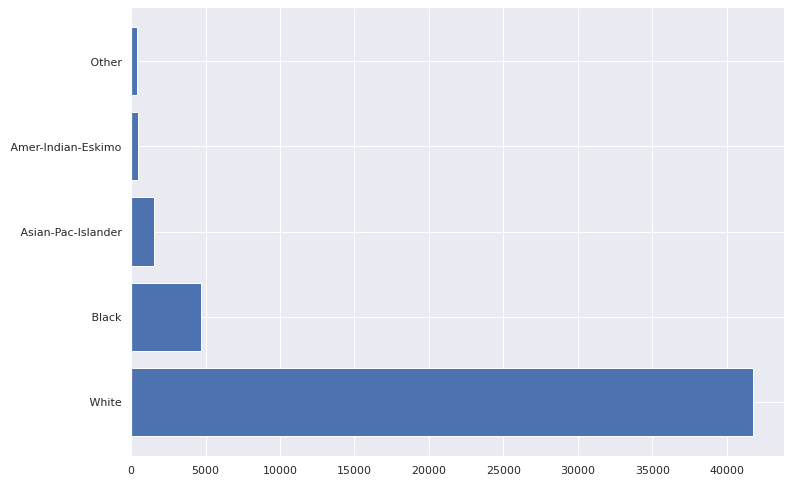

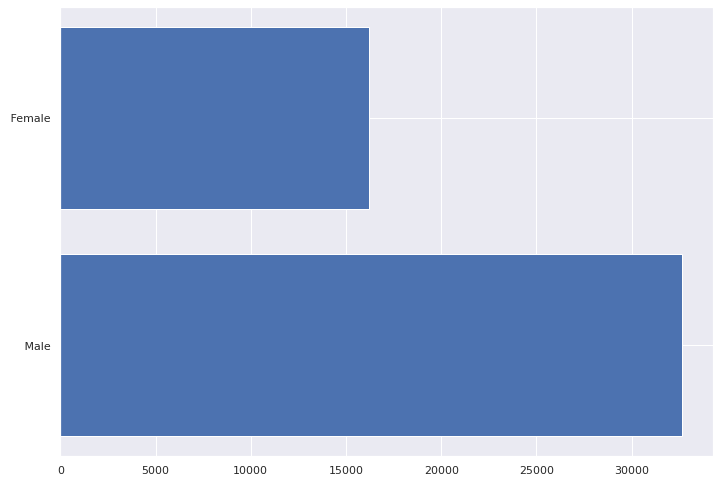

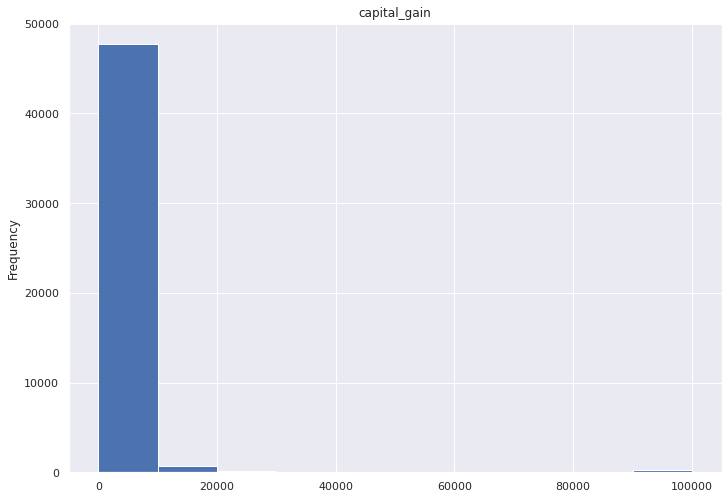

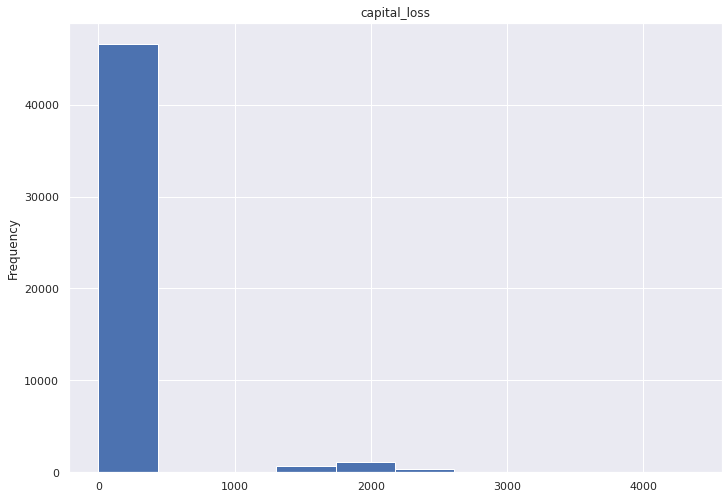

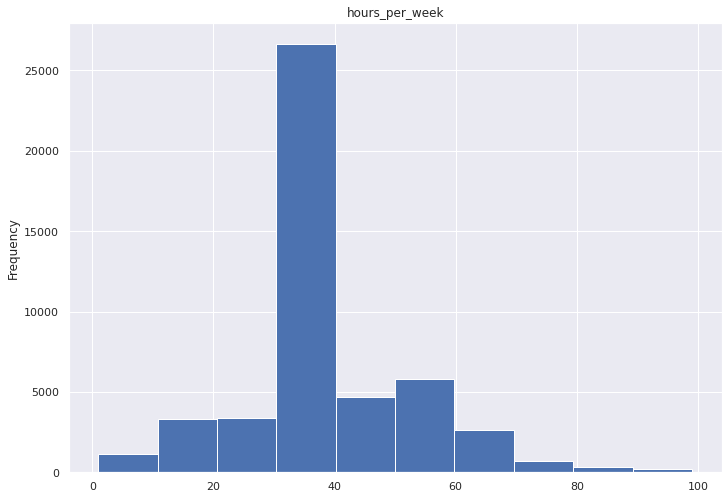

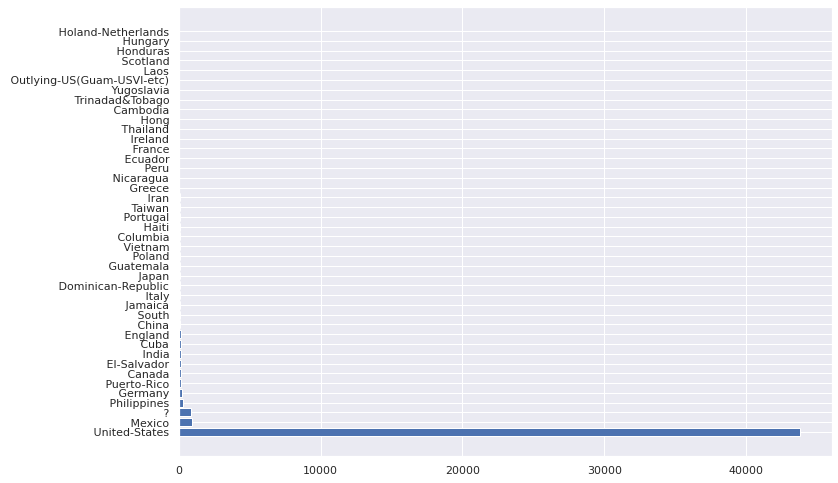

In [28]:
for col in features:
    try:
        raw_data[col].plot.hist(bins=10)
        plt.title(col)
    except TypeError:
        plt.barh(raw_data[col].value_counts().index, raw_data[col].value_counts().values)
    plt.show()

### 2 Przygotowanie danych
##### Przygotowane dane znajdują się w folderze Data
1. Połączenie danych z 2 plików csv - full_data.csv
2. Label encoding - encoded_data.csv
3. One Hot Encoding - OHencoded_data.csv
4. OHE + Standardowe skalowanie  - stand_scaled_data.csv  
$ \begin{aligned} z = (x - u) / s \end{aligned} $  
gdzie: 
u - średnia
s - odchylenie standardowe 
5. OHE + MinMaxScaler - min_max_scaled_data.csv  
$ \begin{aligned} Xscaled = \frac{(x - min(x))}{max(x) - min(x)} \ \end{aligned} $  

### 3 Inżynieria zmiennych 

In [34]:
import pickle
with open('mutual_info.pkl', 'rb') as f:
    mutual_info = pickle.load(f)
with open('spearman.pkl', 'rb') as f:
    spearman = pickle.load(f)
with open('xgb_info.pkl', 'rb') as f:
    xgb_info = pickle.load(f)

In [32]:
mutual_info

[['mutual_information', 'relationship', array([0.11491361])],
 ['mutual_information', 'martial_status', array([0.11119532])],
 ['mutual_information', 'capital_gain', array([0.08471789])],
 ['mutual_information', 'age', array([0.06839676])],
 ['mutual_information', 'education', array([0.06535697])],
 ['mutual_information', 'education_num', array([0.06377712])],
 ['mutual_information', 'occupation', array([0.06300763])],
 ['mutual_information', 'fnlwgt', array([0.03957749])],
 ['mutual_information', 'hours_per_week', array([0.03956763])],
 ['mutual_information', 'capital_loss', array([0.03673815])],
 ['mutual_information', 'sex', array([0.03150726])],
 ['mutual_information', 'workclass', array([0.01756116])],
 ['mutual_information', 'naive_country', array([0.01158081])],
 ['mutual_information', 'race', array([0.01098166])]]

In [33]:
spearman

[['spearman', 'relationship', -0.3329924978918204, 0.0],
 ['spearman', 'education_num', 0.3278147269178631, 0.0],
 ['spearman', 'capital_gain', 0.27773412927560365, 0.0],
 ['spearman', 'age', 0.26943278344728966, 0.0],
 ['spearman', 'hours_per_week', 0.2681657658301571, 0.0],
 ['spearman', 'martial_status', -0.23656066226551642, 0.0],
 ['spearman', 'sex', 0.214628034563928, 0.0],
 ['spearman', 'capital_loss', 0.13824837022717731, 5.7028505856885134e-207],
 ['spearman', 'occupation', 0.08301975706199433, 1.9415855100640214e-75],
 ['spearman', 'race', 0.08062147582854105, 3.097901168758312e-71],
 ['spearman', 'workclass', 0.06417705429636551, 9.487477921611711e-46],
 ['spearman', 'education', 0.03076935109549957, 1.0351206835370442e-11],
 ['spearman', 'naive_country', 0.027293965393194505, 1.609458495080441e-09],
 ['spearman', 'fnlwgt', -0.005934363931014744, 0.18969367592978167]]

In [35]:
xgb_info

[['martial_status', 0.26695514],
 ['capital_gain', 0.14750516],
 ['relationship', 0.1365918],
 ['sex', 0.10572314],
 ['education_num', 0.09393712],
 ['capital_loss', 0.047303792],
 ['occupation', 0.044974726],
 ['age', 0.044208914],
 ['hours_per_week', 0.024951177],
 ['fnlwgt', 0.021042665],
 ['education', 0.01846338],
 ['workclass', 0.018258749],
 ['race', 0.016831458],
 ['naive_country', 0.013252837]]

# 4. Modele
Każdy model był sprawdzany StratifiedKfold
### 4.1 Regresja liniowa
- Model bazowy
- Bardzo szybki
- Brak tuningu hiper-parametrów
- Zaskakująco wysoki ROC_AUC:
    0.840 na zbiorze testowym
    
### 4.2 KNN 
- Użyte zostały wyskalowane dane (zarówno standard jak i minmax)
- Bardzo wolny
- Tuning hiper-parametrów (random_search):  
    1. n_neighbours  
    2. p  
- Bardzo słabe wyniki przy random_search:
    ROC_AUC w okolicach 0.76
    
### 4.3 SVM
- Użyte zostały wyskalowane dane (zarówno standard jak i minmax)
- Bardzo wolny
- Jedynie przy braniu samplowych 10000 wierszy jakkolwiek działał
- Zbyt wolny na tuning hiper-parametrów
- Bazowo bardzo słaby wynik:
    ROC_AUC w okolicach 0.77
 
### 4.4 Lasy losowe
- Zauważalnie szybszy algorytm
- Użyte zostały dane poddane Label Encodingowi
- Tuning hiper-parametrów (random_search):
    1. n_estimators
    2. max_depth
    3. max_features
    4. min_samples_split
- Wyniki lepsze od KNN i SVM, jednak dalej zauważalnie gorsze od Regresji Liniowej 
    ROC_AUC = 0.781
    
### 4.5 XGBoost 
- Podobna prędkość jak Lasy Losowe (możliwy random_search)
- Użyte zostały dane poddane Label Encodingowi
- Tuning hiper-parametrów (random_search):
    1. max_depth
    2. subsample
    3. colsample_bytree
    4. reg_lambda
    5. gamma (zamiennie z reg_lambda)
- Najlepszy wynik:
    ROC_AUC = 80
    
### 4.6 Głębokie sieci neuronowe
- Bezdyskusyjnie najskuteczniejsz model 
- Zostały użyte wyskalowane dane (standard)
- Bardzo dokładny tuning hiper-parametrów (random_search): 
    1. Optimizer (Adam, SGD)
    2. Batch Size 
    3. Dropout 
    4. Regularyzacja L2
- Do tego zostały sprawdzone różne konfiguracje liczby warstw, neuronów oraz funkcje aktywacji. Algorytm działał w następujący sposób: 
    1. Losował funkcje aktywacji oraz liczbe warstw
    2. Dla każdej warstwy losował liczbę neuronów
- Funkcja stary jaka zostala użyta to BinaryCrossEntropy 
- Funkcją aktywacji ostatniego neurona jest sigmoid 
- W najlepszej konfiguracji udało się uzyskać wynik:  
 __ROC_AUC = 0.912 na zbiorze testowym__ 
 
 # 5. Porównanie wyników

In [43]:
results = {
    'Regresja liniowa': 0.84,
    'KNN': 0.76,
    'SVM': 0.77, 
    'Lasy losowe': 0.781,
    'XGBoost': 0.8,
    'Sieci neuronowe': 0.912
}
results_df = pd.DataFrame(data=results, index=[0])
results_df.columns.tolist()


['Regresja liniowa', 'KNN', 'SVM', 'Lasy losowe', 'XGBoost', 'Sieci neuronowe']

In [47]:
results_df.values.tolist()[0]

[0.84, 0.76, 0.77, 0.781, 0.8, 0.912]

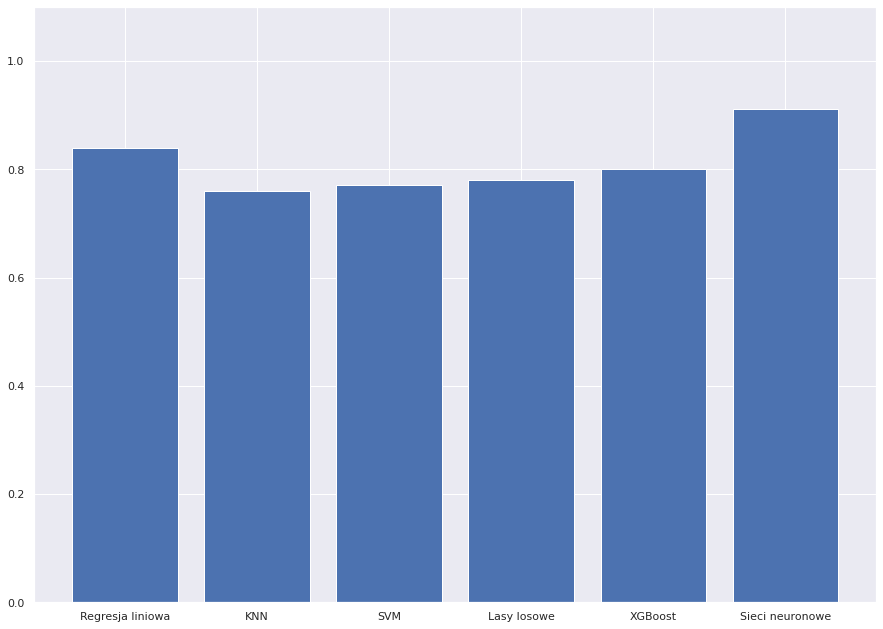

In [58]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.ylim([0, 1.1])
ax.bar(results_df.columns.tolist(), results_df.values.tolist()[0])
plt.show()

# 6. Konkluzje
- Bardzo ciekawe  wyniki
- Zaskakująco dobry wynik regresji liniowej
- Dataset nie nadający się do KNN ani SVM, obliczenia trwają zbyt długo na tuning hiper-parametrów oraz feature engineering
- Zaskakująco słaby wynik Lasów losowych oraz XGBoost
- Zdecydowanie najlepszy wynik głębokich sieci neuronowych 
- Możliwe powód:   
  Silne zależności liniowe